In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'text.usetex': True,
                     'text.latex.preamble': r'\usepackage{amsmath}'})

import numpy as np
import pandas as pd
import uproot4 as up

from nicks_plot_utils import Hist2D, Hist1D

from lmfit.models import Model
import matplotlib.gridspec as gridspec

import boost_histogram as bh

In [2]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

COLOR_BLUE=plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
COLOR_RED=plt.rcParams['axes.prop_cycle'].by_key()['color'][1]
COLOR_DGREEN=plt.rcParams['axes.prop_cycle'].by_key()['color'][3]


['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2']


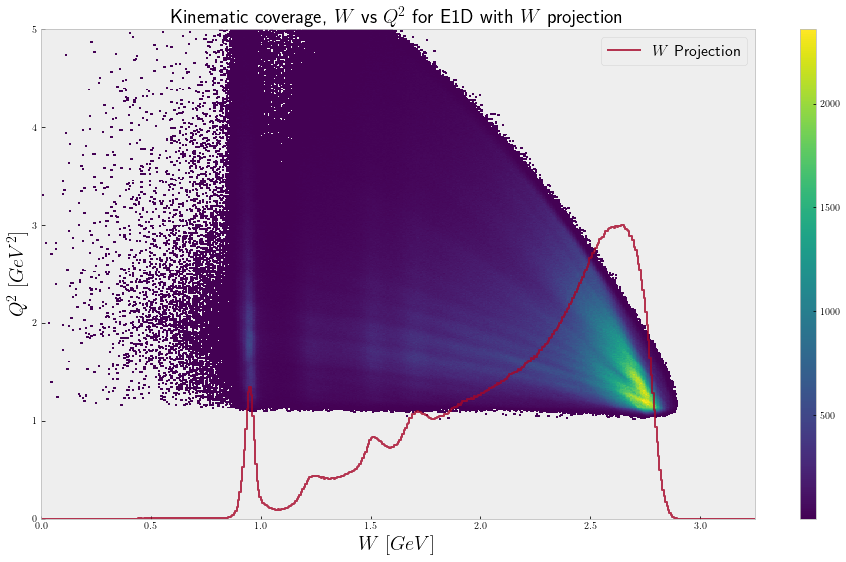

In [3]:
wvsq2 = up.open("/Users/tylern/Desktop/show/Full.root:W vs Q2/WvsQ2_hist")
w = up.open("/Users/tylern/Desktop/show/Full.root:W vs Q2/W")

hist = Hist2D(boost_hist=wvsq2.to_boost(), xname="$W~[GeV]$", yname="$Q^2~[GeV^2]$")
hist_W = Hist1D(boost_hist=w.to_boost(), name="$W~[GeV]$")

hist_W.histogram(label="$W$ Projection", density=True, factor=3.0, filled=False, alpha=0.8, color=COLOR_RED)
hist.plot(colorbar=True, density=False, zeros=False)
plt.title("Kinematic coverage, $W$ vs $Q^2$ for E1D with $W$ projection")

plt.show()

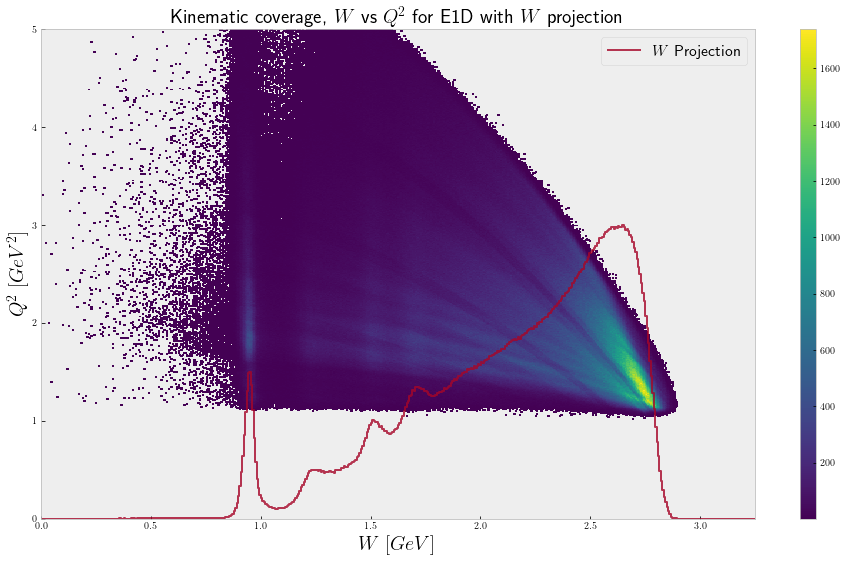

In [4]:
wvsq2 = up.open("/Users/tylern/Desktop/show/today.root:W vs Q2/WvsQ2_hist")
w = up.open("/Users/tylern/Desktop/show/today.root:W vs Q2/W")

hist = Hist2D(boost_hist=wvsq2.to_boost(), xname="$W~[GeV]$", yname="$Q^2~[GeV^2]$")
hist_W = Hist1D(boost_hist=w.to_boost(), name="$W~[GeV]$")

hist_W.histogram(label="$W$ Projection", density=True, factor=3.0, filled=False, alpha=0.8, color=COLOR_RED)
hist.plot(colorbar=True, density=False, zeros=False)
plt.title("Kinematic coverage, $W$ vs $Q^2$ for E1D with $W$ projection")

plt.show()

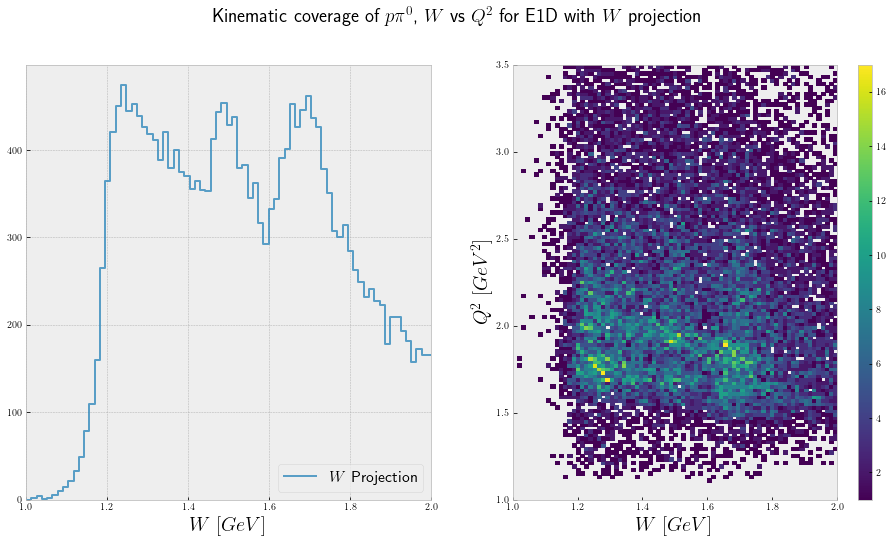

In [5]:
fig, ax = plt.subplots(ncols=2, nrows=1,figsize=[16, 8])

wvsq2 = up.open("/Users/tylern/Desktop/show/today.root:W vs Q2/WvsQ2_Ppi0")
w = up.open("/Users/tylern/Desktop/show/today.root:W vs Q2/W_Ppi0")

hist = Hist2D(boost_hist=wvsq2.to_boost(), xname="$W~[GeV]$", yname="$Q^2~[GeV^2]$")
hist_W = Hist1D(boost_hist=w.to_boost(), name="$W~[GeV]$")

hist_W.histogram(label="$W$ Projection", density=False, filled=False, ax=ax[0])
hist.plot(colorbar=True, density=False, zeros=False, ax=ax[1])
plt.suptitle("Kinematic coverage of $p\pi^{0}$, $W$ vs $Q^2$ for E1D with $W$ projection")
ax[0].set_ylim(bottom=0)
ax[1].set_ylim(bottom=1.0, top=3.5)
ax[0].set_xlim([1.0,2.0])
ax[1].set_xlim([1.0,2.0])

# plt.xlim(left=1.0, right=2.0)

plt.show()

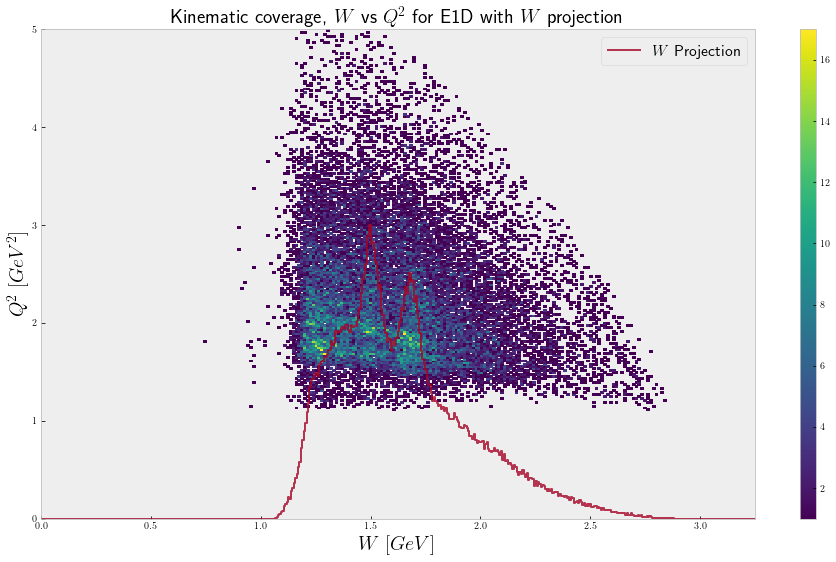

In [6]:
Fullwvsq2 = up.open("/Users/tylern/Desktop/show/Full.root:W vs Q2/WvsQ2_channel")
w = up.open("/Users/tylern/Desktop/show/Full.root:W vs Q2/W_channel")

hist = Hist2D(boost_hist=wvsq2.to_boost(), xname="$W~[GeV]$", yname="$Q^2~[GeV^2]$")
hist_W = Hist1D(boost_hist=w.to_boost(), name="$W~[GeV]$")


hist_W.histogram(label="$W$ Projection", density=True, factor=3.0, filled=False, color=COLOR_RED)
hist.plot(colorbar=True, density=False, zeros=False)
plt.title("Kinematic coverage, $W$ vs $Q^2$ for E1D with $W$ projection")

#plt.xlim(left=1.0, right=2.0)

plt.show()

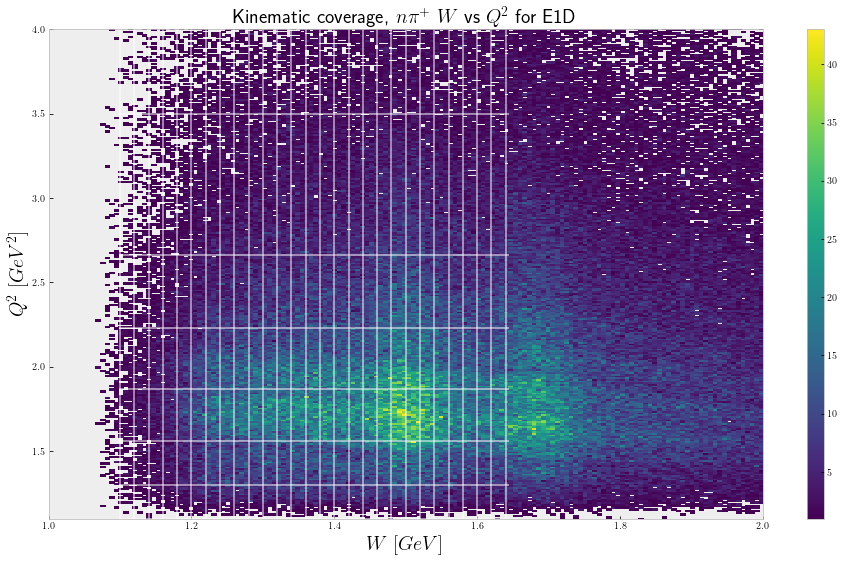

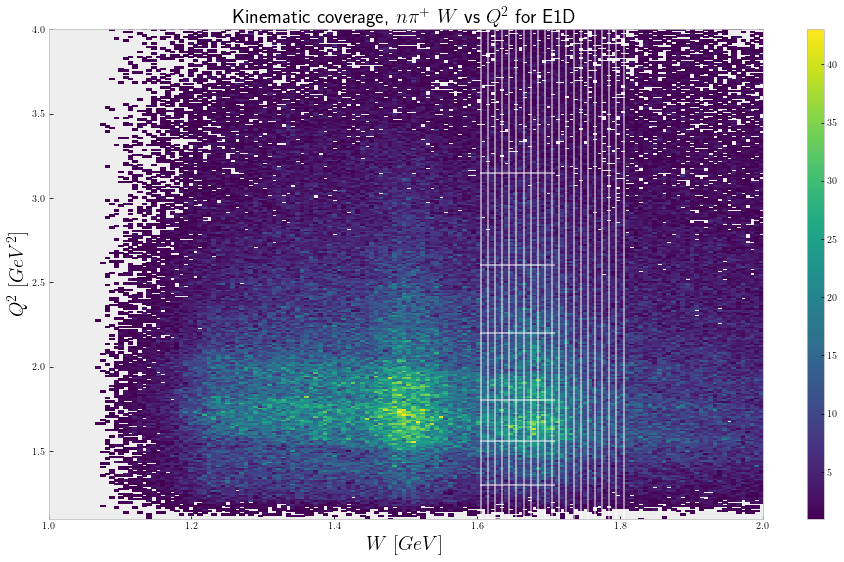

In [7]:
wvsq2 = up.open("/Users/tylern/Desktop/show/Full.root:W vs Q2/WvsQ2_channel")
hist = Hist2D(boost_hist=wvsq2.to_boost(), xname="$W~[GeV]$", yname="$Q^2~[GeV^2]$")


w_bins_e99 = np.array([1.1, 1.12, 1.14, 1.16, 1.18, 1.2, 1.22, 1.24, 1.26, 1.28, 1.3,
                       1.32, 1.34, 1.36, 1.38, 1.4, 1.42, 1.44, 1.46, 1.48, 1.5, 1.52,
                       1.54, 1.56, 1.58, 1.6, 1.62, 1.64])

w_bins_k = np.array([1.605, 1.615, 1.625, 1.635, 1.645, 1.655, 1.665, 1.675, 1.685, 1.695,
                     1.705, 1.715, 1.725, 1.735, 1.745, 1.755, 1.765, 1.775, 1.785, 1.795, 1.805])

q2_bins_e99 = np.array([1.1, 1.30, 1.56, 1.87, 2.23, 2.66, 3.5])
q2_bins_k = np.array([1.1, 1.30, 1.56, 1.8,  2.2,  2.6,  3.15, 4.0])



for i in range(2):
    if i == 0:
        w_bins = w_bins_e99
        q2_bins = q2_bins_e99
    else:
        w_bins = w_bins_k
        q2_bins = q2_bins_k
        
    hist.plot(colorbar=True, density=False, zeros=False)
    plt.title("Kinematic coverage, $n\pi^{+}$ $W$ vs $Q^2$ for E1D")
    plt.ylim(1.1, 4.0)
    plt.xlim(1.0, 2.0)
    
    
        
    for q2 in q2_bins:
        plt.axhline(q2, c='w', alpha=0.5, xmin=((min(w_bins)-1)/1.0), xmax=max(w_bins)/2.55)

    for w in w_bins:
        plt.axvline(w, c='w', alpha=0.5) #, ymin=(min(q2_bins)), ymax=(max(q2_bins)))


    plt.show()

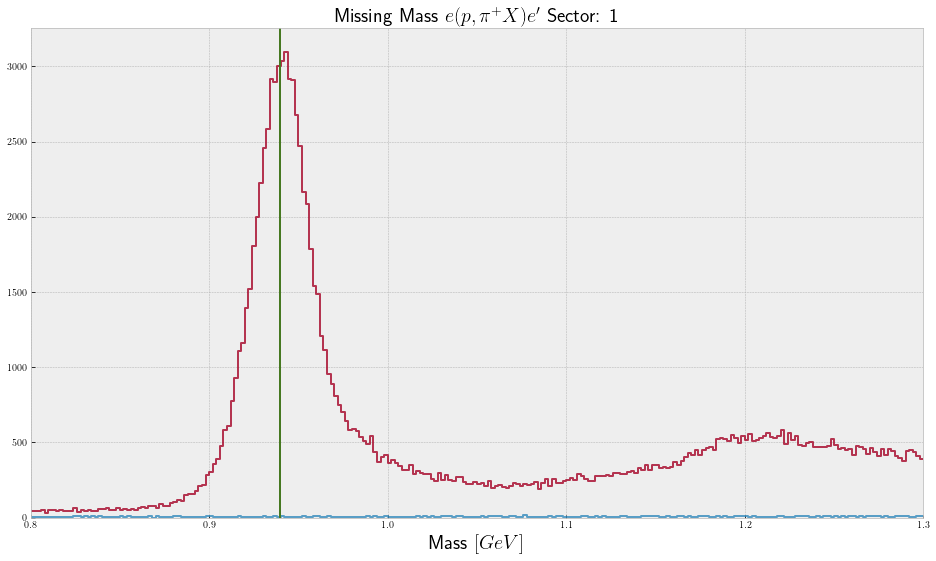

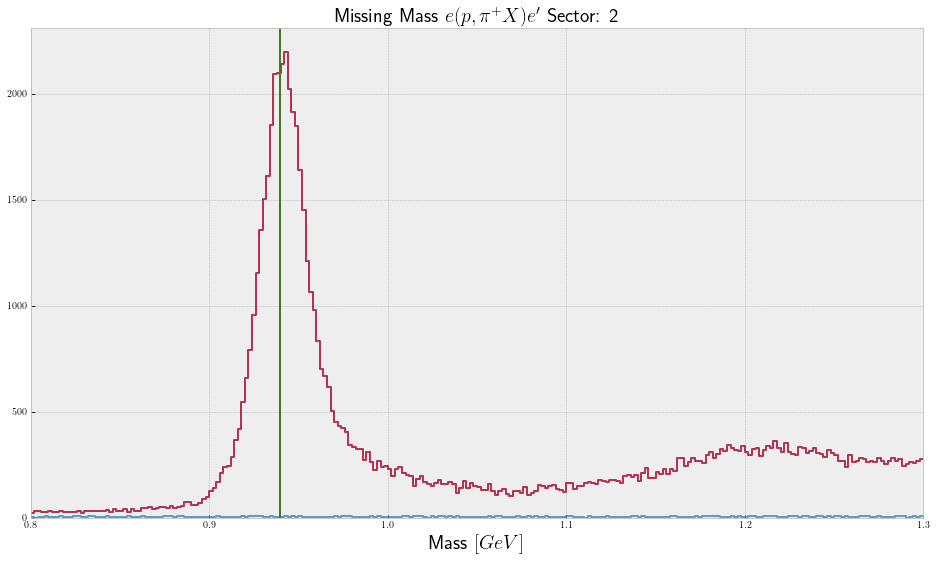

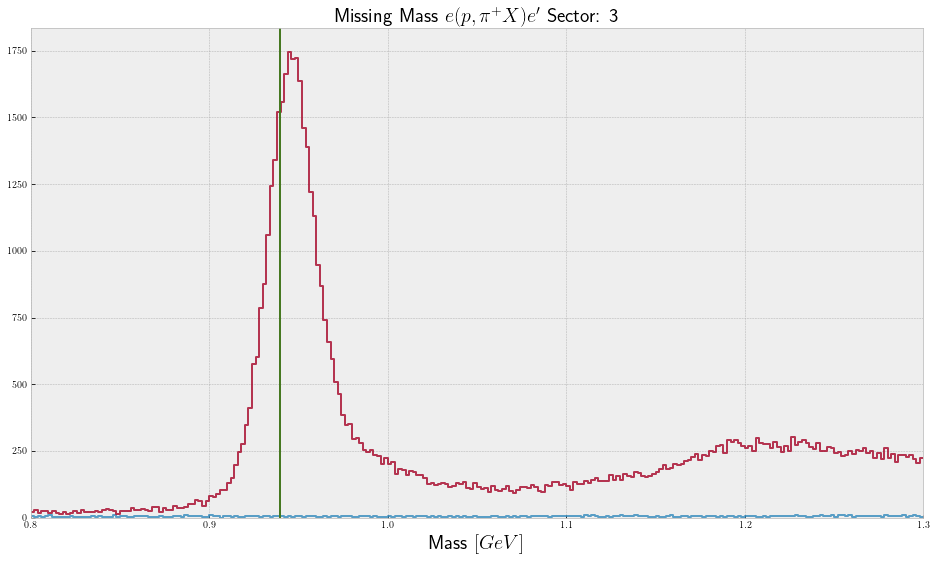

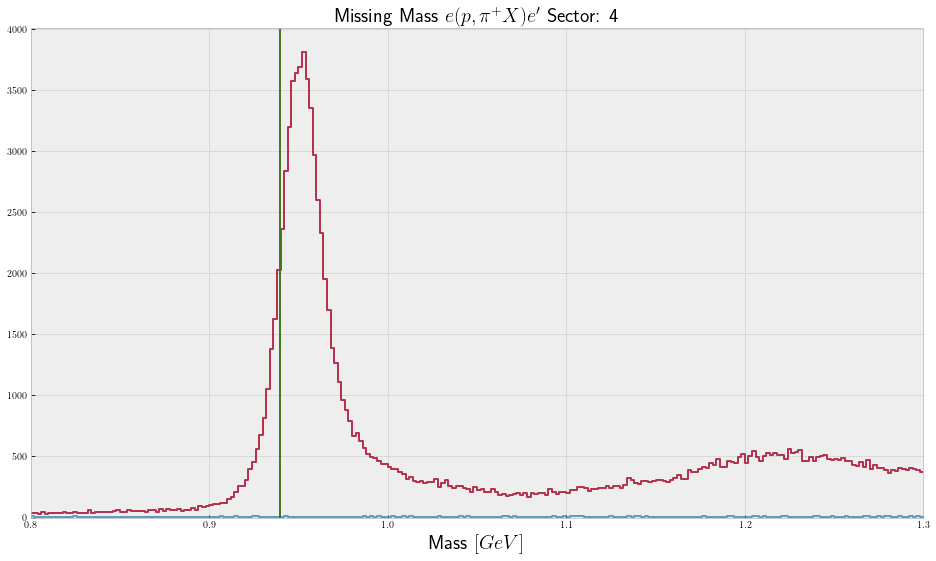

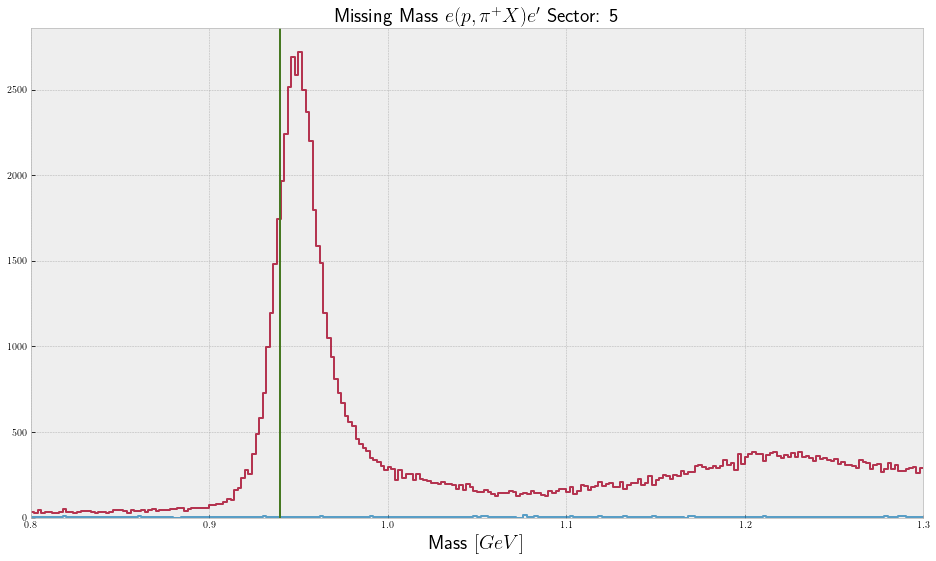

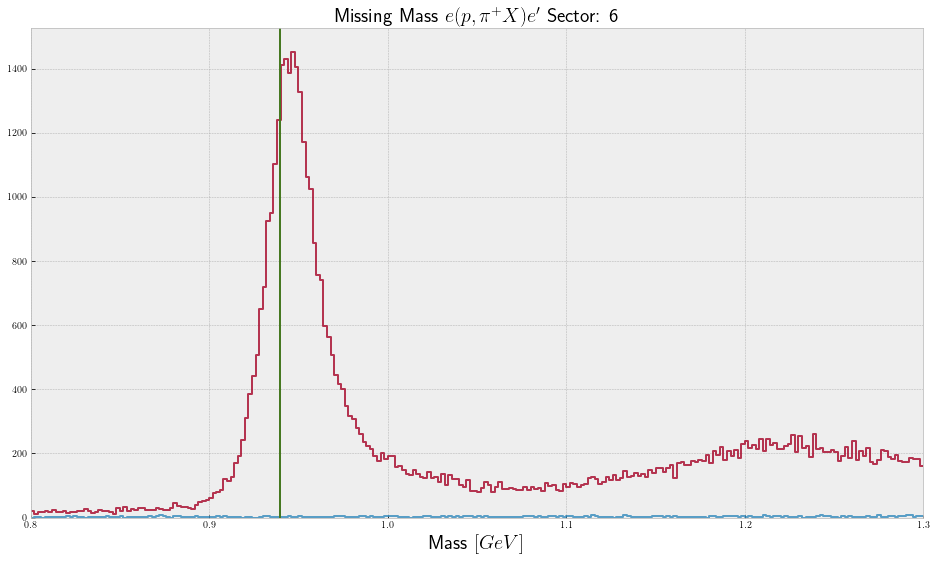

In [23]:
# for i in range(6):
#     mm = up.open(f"/Users/tylern/Desktop/show/today_test.root:Missing_Mass/Missing_Mass_small_{i}")
#     hist_mm = Hist1D(boost_hist=mm.to_boost(), name="Mass$~[GeV]$")
#     hist_mm.histogram(density=True, alpha=0.8)
#     mm = up.open(f"/Users/tylern/Desktop/show/today.root:Missing_Mass/Missing_Mass_small_{i}")
#     hist_mm = Hist1D(boost_hist=mm.to_boost(), name="Mass$~[GeV]$")
#     hist_mm.histogram(density=True, alpha=0.8)
#     plt.title(r"Missing Mass $e ( p, \pi^{+} X ) e^{\prime}$ Sector: "+f"{i+1}")
#     plt.ylim(bottom=0)
#     plt.xlim(left=0.8, right=1.3)
#     plt.axvline(0.939565, c=COLOR_DGREEN)
#     plt.show()

for i in range(6):
    mm = up.open(f"/Users/tylern/Desktop/show/today_test.root:Missing_Mass/Missing_Mass_small_{i}")
    hist_mm = Hist1D(boost_hist=mm.to_boost(), name="Mass$~[GeV]$")
    hist_mm.histogram(density=False, alpha=0.8)
    
    mm = up.open(f"/Users/tylern/Desktop/show/today.root:Missing_Mass/Missing_Mass_small_{i}")
    hist_mm = Hist1D(boost_hist=mm.to_boost(), name="Mass$~[GeV]$")
    hist_mm.histogram(density=False, alpha=0.8)
    plt.title(r"Missing Mass $e ( p, \pi^{+} X ) e^{\prime}$ Sector: "+f"{i+1}")
    plt.ylim(bottom=0)
    plt.xlim(left=0.8, right=1.3)
    plt.axvline(0.939565, c=COLOR_DGREEN)
    plt.show()

a 4.1353e-01 b -1.3651e-02 c 1.5691e-05
a 8.3981e-02 b 4.6968e-02 c -4.3982e-05


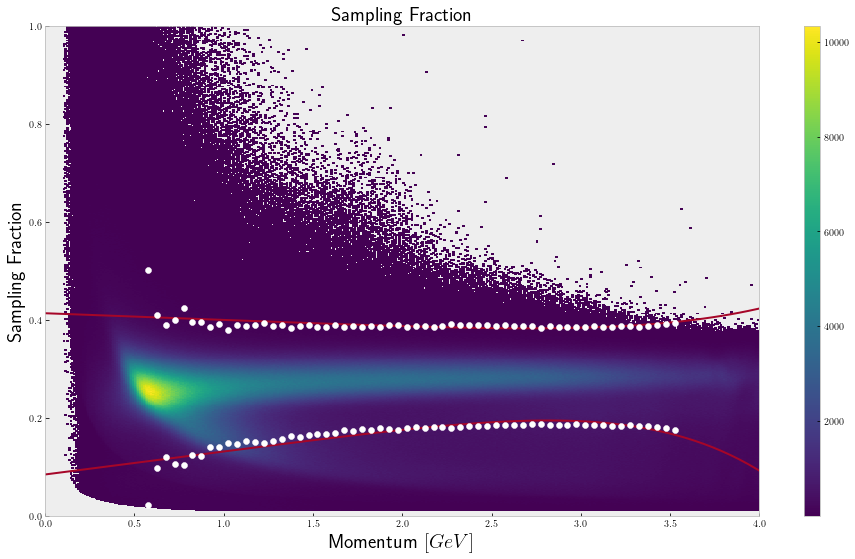

In [9]:
par_top = [0.368209, 0.000961273, 4.8e-07]
par_bot = [0.162189, 0.0134756, -2e-05]
xs = np.linspace(0,5,100)

def ec_fit(x, a, b, c):
    return a + b * x + c * x * x * x * x * x * x

sf = up.open("/Users/tylern/Desktop/show/Full.root:EC_hists/EC_sampling_fraction")

for top_bot in ["/Users/tylern/Desktop/show/Full.root:EC_hists/Positive_EC_graph", "/Users/tylern/Desktop/show/Full.root:EC_hists/Negative_EC_graph"]:
    sf_top = up.open(top_bot)
    X = sf_top.tojson()['fX'][5:65]
    Y = sf_top.tojson()['fY'][5:65]

    model = Model(ec_fit)
    parms = model.make_params(a=par_bot[0], b=par_bot[1], c=par_bot[2])
    

    result = model.fit(Y, parms, x=X)
    plt.plot(xs, model.eval(result.params, x=xs), c=COLOR_RED)

    plt.scatter(X, Y, c='w', zorder=4)
    print(f"a {result.params['a'].value:0.4e} b {result.params['b'].value:0.4e} c {result.params['c'].value:0.4e}" )

hist_mm = Hist2D(boost_hist=sf.to_boost(), name="Mass$~[GeV]$")
hist_mm.plot(zeros=False, density=False)

plt.ylim(bottom=0, top=1.0)
plt.xlim(left=0, right=4.0)

plt.title("Sampling Fraction")
plt.xlabel("Momentum $[GeV]$")
plt.ylabel("Sampling Fraction")

plt.show()



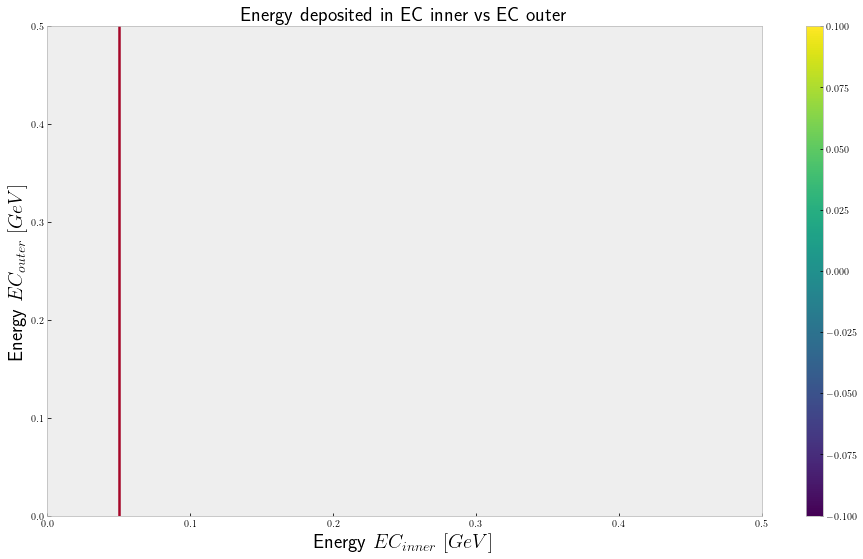

In [10]:
inout = up.open("/Users/tylern/Desktop/show/Full.root:EC_hists/ECin_ECout")

hist_inout = Hist2D(boost_hist=inout.to_boost(), name="Mass$~[GeV]$")
hist_inout.plot(zeros=False, density=False)

# plt.ylim(bottom=0, top=1.0)
# plt.xlim(left=0, right=4.0)

plt.axvline(0.05, c=COLOR_RED, lw=2.5)
plt.title("Energy deposited in EC inner vs EC outer")
plt.xlabel("Energy $EC_{inner}~[GeV]$")
plt.ylabel("Energy $EC_{outer}~[GeV]$")

plt.show()

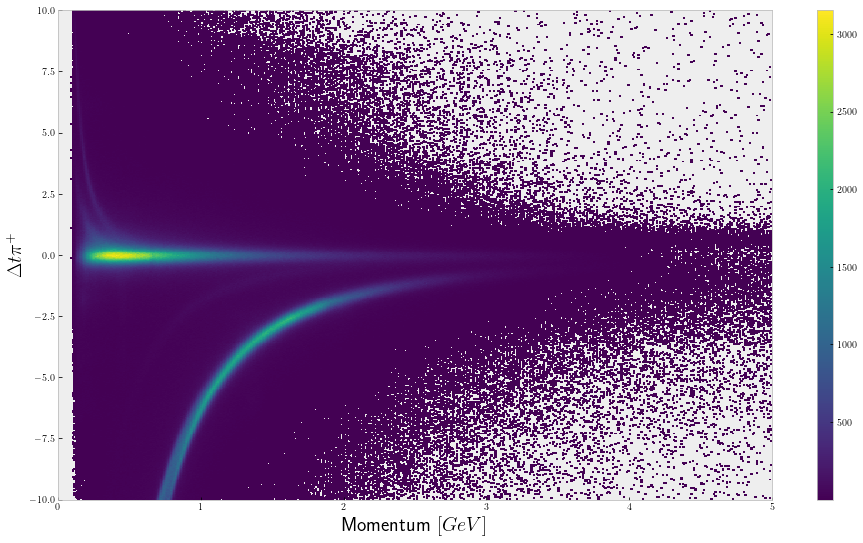

In [11]:
dt_pip = up.open("/Users/tylern/Desktop/show/Full.root:Delta_T/delta_t_mass_PIP")
hist_dt = Hist2D(boost_hist=dt_pip.to_boost(), name="Momentum$~[GeV]$")
hist_dt.plot(zeros=False, density=False)


plt.title("")
plt.xlabel("Momentum $[GeV]$")
plt.ylabel("$\Delta t \pi^{+}$")

plt.show()

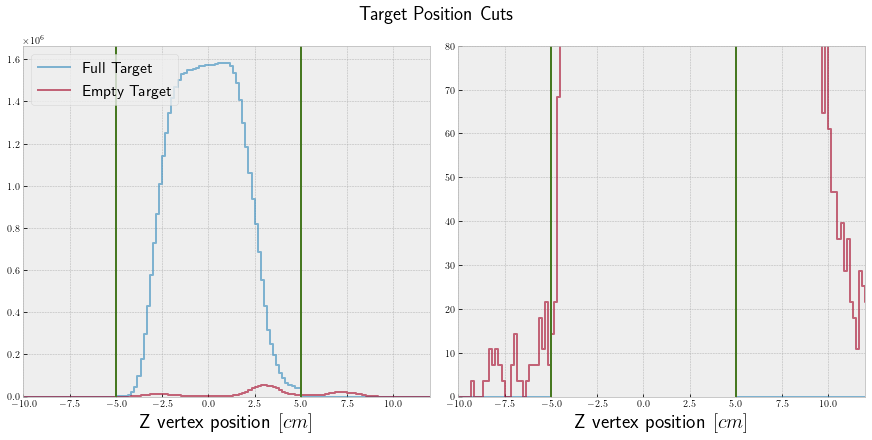

In [12]:
left=-5.0
right=5.0

Q_FULL = 4348.46636E-6  # 03/04/2021
Q_EMPTY = 1211.06E-6

ratio = Q_FULL/Q_EMPTY

fig = plt.figure(constrained_layout=True, figsize=[12,6])
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig, wspace=0.1, hspace=0.1)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])


for EF in ['Full','Empty']:
    vz = up.open(f"/Users/tylern/Desktop/show/{EF}.root:Beam Position/Beam_Position_Z_cut")
    hist_vz = Hist1D(boost_hist=vz.to_boost(), name="Z vertex position $[cm]$")      
    if EF == 'Empty':
        factor = Q_FULL
    else:
        factor = Q_EMPTY
        
    hist_vz.histogram(density=False, filled=False, alpha=0.6, label=f'{EF} Target', ax=ax1, loc='upper left', factor=ratio)
    hist_vz.histogram(density=False, filled=False, alpha=0.6, ax=ax2, loc='upper left')

    
# vz = up.open(f"/Users/tylern/Desktop/show/Empty.root:Beam Position/Beam_Position_Z_cut")
# hist_vz = Hist1D(boost_hist=vz.to_boost(), name="Z vertex position $[cm]$")
# hist_vz.histogram(density=False, filled=False, alpha=0.6, label=f'Empty Target', color=COLOR_RED, ax=ax2, loc='upper left')



ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0, top=80)
ax1.set_xlim(left=-10, right=12)
ax2.set_xlim(left=-10.0, right=12)
ax1.axvline(-5.0, c=COLOR_DGREEN)
ax1.axvline(5.0, c=COLOR_DGREEN)

ax2.axvline(-5.0, c=COLOR_DGREEN)
ax2.axvline(5.0, c=COLOR_DGREEN)
plt.suptitle("Target Position Cuts")
plt.show()

0.20205452358625722
0.05377022074435692
<Parameter 'g1_center', value=0.12791237216530707 +/- 0.000161, bounds=[0.1:0.2]>


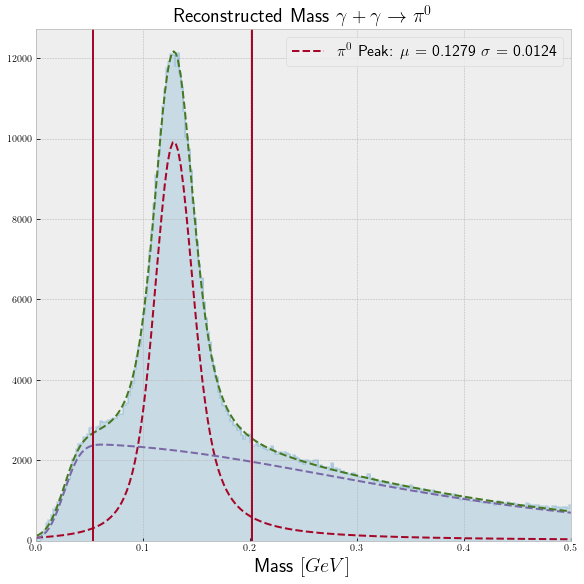

In [13]:
from lmfit.models import GaussianModel, SkewedVoigtModel


fig = plt.figure(constrained_layout=True, figsize=[8, 8])

mmpi0 = up.open("/Users/tylern/Desktop/show/today.root:Missing_Mass/Mass_pi0")
hist_mmpi0 = Hist1D(boost_hist=mmpi0.to_boost(), name="Mass$~[GeV]$")
hist_mmpi0.histogram(density=False, filled=True, alpha=0.2)
plt.title(r"Reconstructed Mass $\gamma + \gamma \rightarrow \pi^{0}$")
plt.ylim(bottom=0)
plt.xlim(left=0, right=0.5)


y, x = mmpi0.to_numpy()
top = np.max(y)
x = (x[1:] + x[:-1]) / 2
y = y/np.max(y)

gauss1 = SkewedVoigtModel(prefix='g1_')
pars = gauss1.guess(y, x=x)
pars.update(gauss1.make_params())
pars['g1_center'].set(value=0.128, min=0.1,max=0.2)

gauss2 = SkewedVoigtModel(prefix='g2_')
pars.update(gauss2.make_params())


mod = gauss1 + gauss2
xs=np.linspace(0,0.5,200)
init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

comps = out.eval_components(x=xs)

plt.plot(xs, comps['g1_']*top, '--', label=f"$\pi^{0}$ Peak: $\mu$ = {out.params['g1_center'].value:0.4f} $\sigma$ = {out.params['g1_sigma'].value:0.4f}")
plt.plot(xs, comps['g2_']*top, '--')
plt.plot(x, out.best_fit*top, '--')
plt.legend(loc='upper right')

plt.axvline(out.params['g1_center']+6*out.params['g1_sigma'], c=COLOR_RED)
plt.axvline(out.params['g1_center']-6*out.params['g1_sigma'], c=COLOR_RED)

print(out.params['g1_center']+6*out.params['g1_sigma'])
print(out.params['g1_center']-6*out.params['g1_sigma'])
print(out.params['g1_center'])

plt.show()

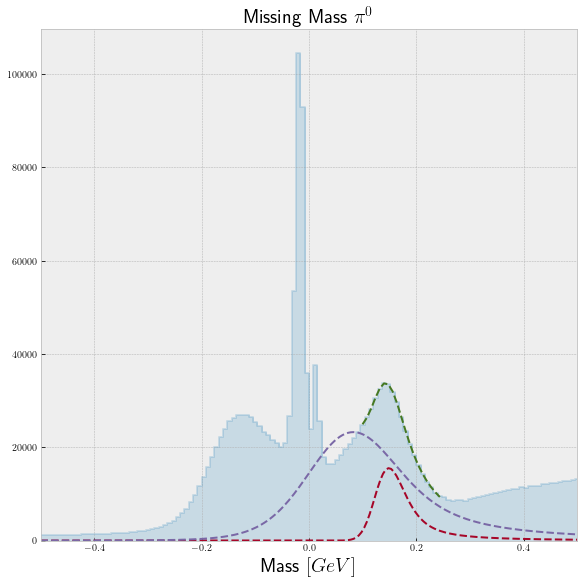

In [14]:
fig = plt.figure(constrained_layout=True, figsize=[8, 8])

mmeta = up.open("/Users/tylern/Desktop/show/Full.root:Missing_Mass/Missing_Mass_pi0")
hist_mmeta = Hist1D(boost_hist=mmeta.to_boost(), name="Mass$~[GeV]$")
hist_mmeta.histogram(density=False, filled=True, alpha=0.2)


_y, _x = mmeta.to_numpy()
_x = (_x[1:] + _x[:-1]) / 2
# _y = _y/np.max(_y)



cuts = [np.where((_x > 0.1) & (_x < 0.25))]
for cut in cuts:
    x = _x[cut]
    y = _y[cut]/np.max(_y[cut])
    top = np.max(_y[cut])

    gauss1 = SkewedVoigtModel(prefix='g1_')
    pars = gauss1.guess(y, x=x)
    pars.update(gauss1.make_params())
    pars['g1_center'].set(value=0.134976, min=0.1, max=0.2)

    gauss2 = SkewedVoigtModel(prefix='g2_')
    pars.update(gauss2.make_params())

    mod = gauss1 + gauss2
    xs=np.linspace(-0.5,0.5,200)
    init = mod.eval(pars, x=x)
    out = mod.fit(y, pars, x=x)

    comps = out.eval_components(x=xs)

    plt.plot(xs, comps['g1_']*top, '--')#, label=f"$\pi^{0}$ Peak: $\mu$ = {out.params['g1_center'].value:0.4f} $\sigma$ = {out.params['g1_sigma'].value:0.4f}")
    plt.plot(xs, comps['g2_']*top, '--')
    plt.plot(x, out.best_fit*top, '--')
    # plt.legend(loc='upper right')
    


#     plt.axvline(out.params['g1_center']+3*out.params['g1_sigma'], c=COLOR_RED)
#     plt.axvline(out.params['g1_center']-3*out.params['g1_sigma'], c=COLOR_RED)
#     plt.axvline(out.params['g1_center'].value, c=COLOR_RED)


plt.title(r"Missing Mass $\pi^{0}$")
plt.ylim(bottom=0)
plt.xlim(left=-0.5, right=0.5)
#plt.axvline(0.134976, c=COLOR_BLUE)


plt.show()

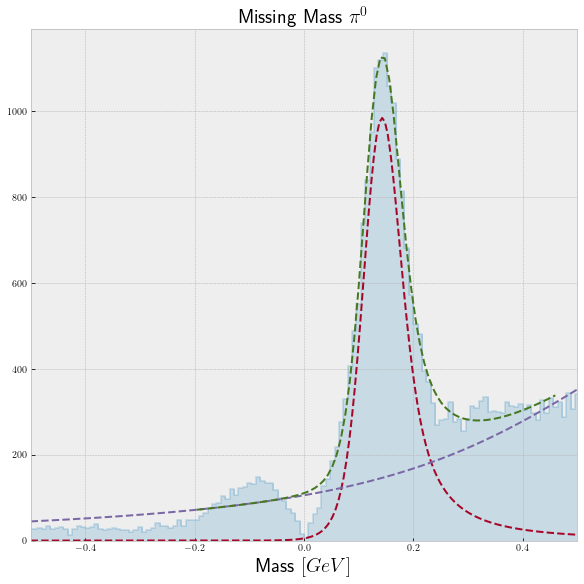

In [15]:
fig = plt.figure(constrained_layout=True, figsize=[8, 8])

mmeta = up.open("/Users/tylern/Desktop/show/today.root:Missing_Mass/Missing_Mass_pi0_otherCut")
hist_mmeta = Hist1D(boost_hist=mmeta.to_boost(), name="Mass$~[GeV]$")
hist_mmeta.histogram(density=False, filled=True, alpha=0.2)


_y, _x = mmeta.to_numpy()
_x = (_x[1:] + _x[:-1]) / 2
# _y = _y/np.max(_y)



cuts = [np.where((_x > -0.2) & (_x < 0.46))]
for cut in cuts:
    x = _x[cut]
    y = _y[cut]/np.max(_y[cut])
    top = np.max(_y[cut])

    gauss1 = SkewedVoigtModel(prefix='g1_')
    pars = gauss1.guess(y, x=x)
    pars.update(gauss1.make_params())
    pars['g1_center'].set(value=0.134976, min=0.0, max=0.2)

    gauss2 = SkewedVoigtModel(prefix='g2_')
    pars.update(gauss2.make_params())

    mod = gauss1 + gauss2
    xs=np.linspace(-0.5,0.5,200)
    init = mod.eval(pars, x=x)
    out = mod.fit(y, pars, x=x)

    comps = out.eval_components(x=xs)

    plt.plot(xs, comps['g1_']*top, '--')#, label=f"$\pi^{0}$ Peak: $\mu$ = {out.params['g1_center'].value:0.4f} $\sigma$ = {out.params['g1_sigma'].value:0.4f}")
    plt.plot(xs, comps['g2_']*top, '--')
    plt.plot(x, out.best_fit*top, '--')
    # plt.legend(loc='upper right')
    


#     plt.axvline(out.params['g1_center']+3*out.params['g1_sigma'], c=COLOR_RED)
#     plt.axvline(out.params['g1_center']-3*out.params['g1_sigma'], c=COLOR_RED)
#     plt.axvline(out.params['g1_center'].value, c=COLOR_RED)


plt.title(r"Missing Mass $\pi^{0}$")
plt.ylim(bottom=0)
plt.xlim(left=-0.5, right=0.5)
#plt.axvline(0.134976, c=COLOR_BLUE)


plt.show()

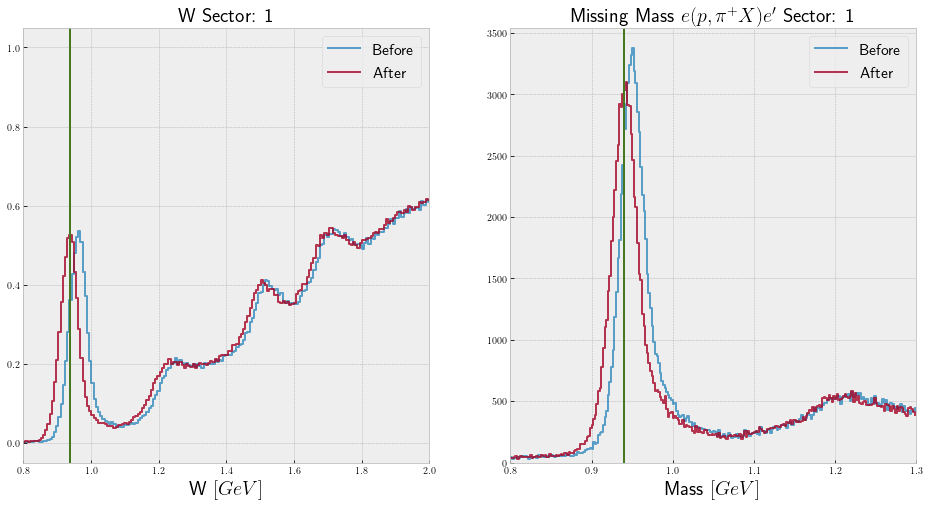

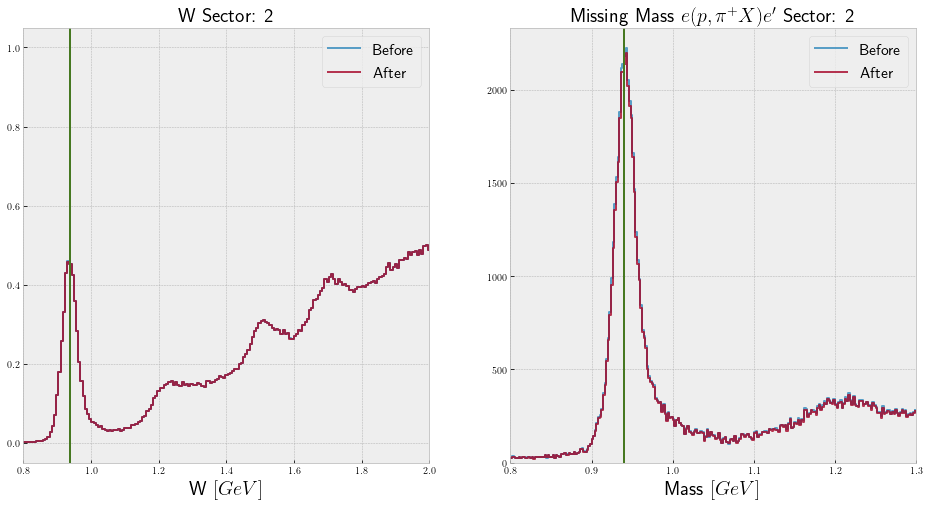

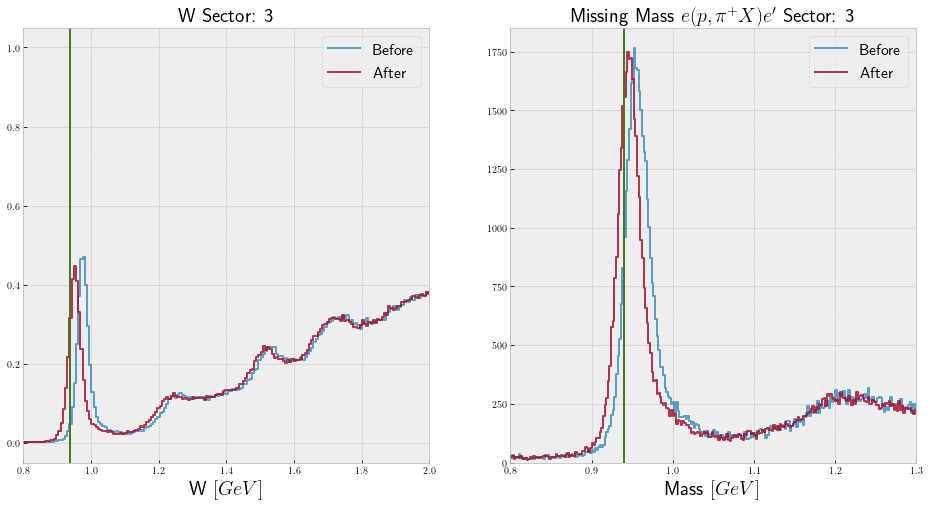

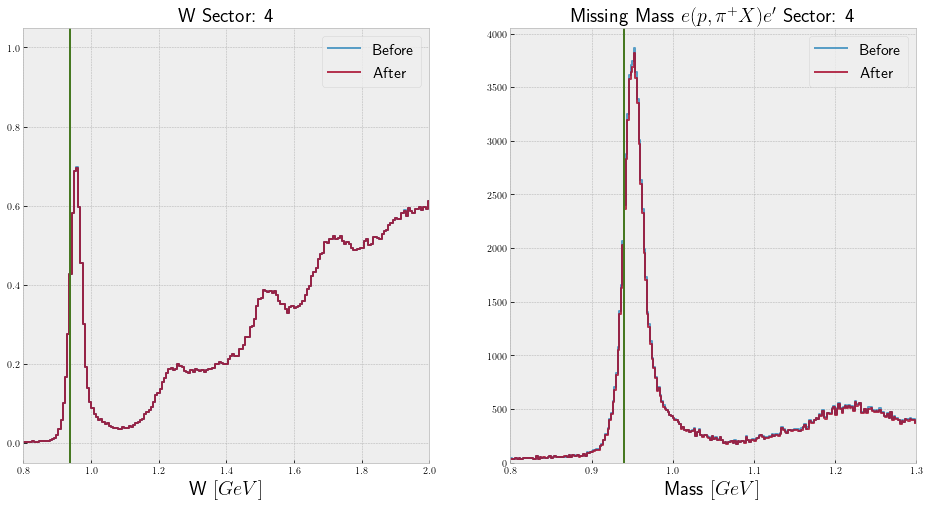

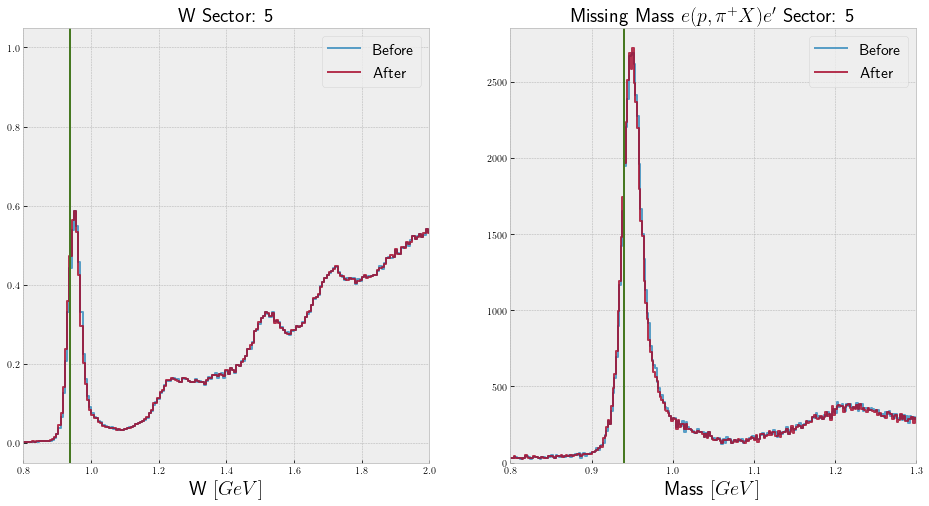

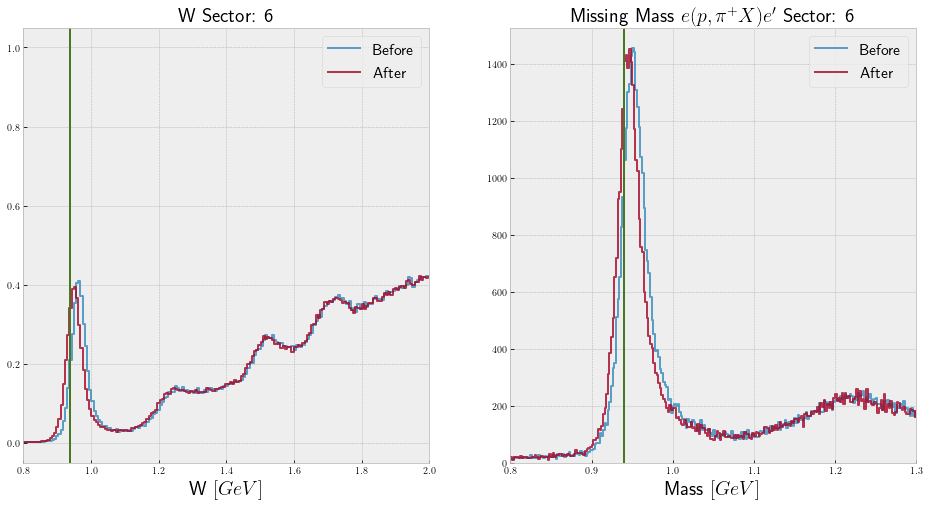

In [35]:
for i in range(6):
    fig, ax = plt.subplots(ncols=2,nrows=1,figsize=[16, 8])
    
    w = up.open(f"/Users/tylern/Desktop/show/today_test.root:W_vs_Q2_sec/W_sec_{i+1}")
    hist_w = Hist1D(boost_hist=w.to_boost(), name="W$~[GeV]$")
    hist_w.histogram(density=True, alpha=0.8, ax=ax[0], label="Before")
    
    w = up.open(f"/Users/tylern/Desktop/show/today.root:W_vs_Q2_sec/W_sec_{i+1}")
    hist_w = Hist1D(boost_hist=w.to_boost(), name="W$~[GeV]$")
    hist_w.histogram(density=True, alpha=0.8, ax=ax[0], label="After")
    ax[0].set_title(r"W Sector: "+f"{i+1}")
    
    #ax[0].set_ylim([0,10_000])
    ax[0].set_xlim(left=0.8, right=2.0)
    ax[0].axvline(0.938272088, c=COLOR_DGREEN)
    
    
    mm = up.open(f"/Users/tylern/Desktop/show/today_test.root:Missing_Mass/Missing_Mass_small_{i}")
    hist_mm = Hist1D(boost_hist=mm.to_boost(), name="Mass$~[GeV]$")
    hist_mm.histogram(density=False, alpha=0.8, ax=ax[1], label="Before")
    
    mm = up.open(f"/Users/tylern/Desktop/show/today.root:Missing_Mass/Missing_Mass_small_{i}")
    hist_mm = Hist1D(boost_hist=mm.to_boost(), name="Mass$~[GeV]$")
    hist_mm.histogram(density=False, alpha=0.8, ax=ax[1], label="After")
    ax[1].set_title(r"Missing Mass $e ( p, \pi^{+} X ) e^{\prime}$ Sector: "+f"{i+1}")
    ax[1].set_xlim(left=0.8, right=1.3)
    ax[1].set_ylim(bottom=0)
    ax[1].axvline(0.939565, c=COLOR_DGREEN)
    
    
    plt.show()

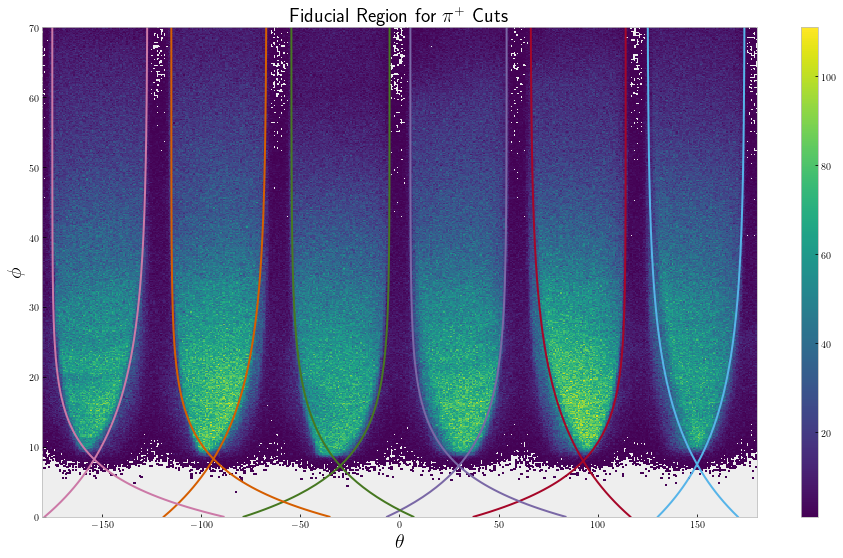

In [64]:
# a0mh = [25.0, 25.5, 25.5, 26, 26, 26]
# a0xh = [25.0, 25.0, 26.0, 24, 25.5, 25]
# a1mh = [0.07, 0.165, 0.11, 0.14, 0.15, 0.08]
# a1xh = [0.15, 0.11, 0.15, 0.07, 0.07, 0.07]
# a2mh = [8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
# a2xh = [8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
# a3mh = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
# a3xh = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


a0mh = [25.0, 25.5, 25.5, 26, 26, 26]
a1mh = [0.07, 0.14, 0.11, 0.14, 0.15, 0.07]
a2mh = [10.0, 8.0, 8.0, 8.0, 8.0, 8.0]
a3mh = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

a0xh = [25.0, 25.0, 26.0, 24, 24, 25]
a1xh = [0.14, 0.11, 0.13, 0.07, 0.07, 0.07]
a2xh = [8.0, 8.0, 8.0, 11.0, 11.0, 8.0]
a3xh = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


uncenter = {1: 90,
            2: 30,
            3: -30,
            4: -90,
            5: -150,
            6: 150,
            }




# a0mh = [26, 26.0, 26.0, 26, 27.0, 26.0]
# a1mh = [0.22, 0.22, 0.22, 0.22, 0.16, 0.16]
# a2mh = [8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
# a3mh = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
def hadron_fid_phi_plus(theta, sec):
    sec = sec - 1
    return (a0xh[sec] * (1.0 - np.exp(-a1xh[sec] * (theta - a2xh[sec]))) - a3xh[sec])

def hadron_fid_phi_minus(theta, sec):
    sec = sec - 1
    return -1*(a0mh[sec] * (1.0 - np.exp(-a1mh[sec] * (theta - a2mh[sec]))) - a3mh[sec])

hfid = up.open("/Users/tylern/Desktop/show/Full.root:Fid_cuts/pip_fid")

hist_hfid = Hist2D(boost_hist=hfid.to_boost(), name="Mass$~[GeV]$")
hist_hfid.plot(zeros=False, density=False)


thetas = np.linspace(0, 80, 200)
phis = np.linspace(0, 70, 200)

for secs in [1,2,3,4,5,6]:
    c = plt.rcParams['axes.prop_cycle'].by_key()['color'][secs]
    plt.plot(hadron_fid_phi_plus(thetas, secs)+uncenter[secs], phis, c=c, label=f"{secs}")
    plt.plot(hadron_fid_phi_minus(thetas, secs)+uncenter[secs], phis, c=c)
    
# plt.legend()

plt.xlim(-180,180)
plt.ylim(0,70)
plt.title("Fiducial Region for $\pi^{+}$ Cuts")
plt.xlabel("$\\theta$")
plt.ylabel("$\phi$")

plt.show()


In [18]:
hist = hfid.to_boost()

In [19]:
hist.project

<bound method Histogram.project of Histogram(
  Regular(500, -180, 180),
  Regular(500, 0, 80),
  storage=Double()) # Sum: 5098900.0 (5262677.0 with flow)>